##### Copyright 2019 The TensorFlow Authors.

# Convolutional Neural Network (CNN)

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [21]:
#TODO: import tensorflow
import tensorflow as tf


from tensorflow.keras import datasets, layers, models

#TODO: import matplotlib
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [22]:
#TODO: Load cifar10 dataset into train and test
( train_images , train_labels ), ( test_images , test_labels ) = datasets.cifar10.load_data()



In [23]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0 , test_images / 255.0 

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


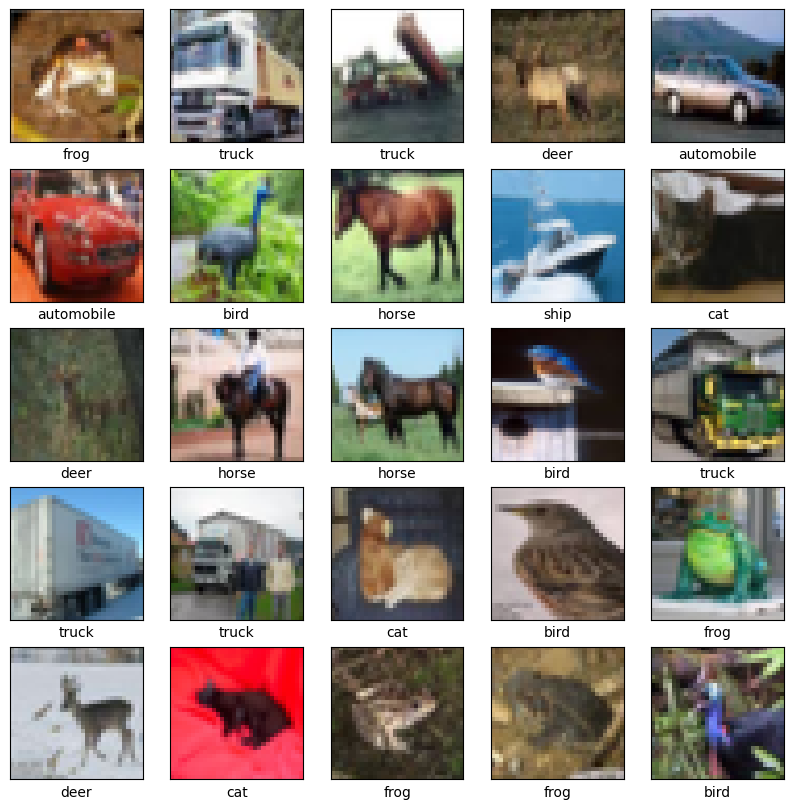

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize= (10,10))

for i in range(25) : # loop over 25 images
    plt.subplot(5,5, i+1) #create a subplot of size 5,5 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) #dont show the grid
    plt.imshow( train_images[i] ) # plot the image of index i of the training set
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index (to access the label name for the array)
    plt.xlabel( class_names[train_labels[i][0]] ) # add the class name of the image of index i
plt.show()

In [25]:
# Explanation for the idea mentioned in plt.xlabel above
print(train_labels[i])
print(train_labels[i][0])
print(class_names[train_labels[i][0]])

[2]
2
bird


### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [26]:
#Use Keras Sequential API

model = models.Sequential() #init keras sequential
#TODO: add Convolution 2d layer, with 32 neurons, and size of kernel 3,3, activation function relu
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)) )
#TODO: add a Maxpooling 2d layer
model.add(layers.MaxPooling2D((2,2)))
#TODO: add another conv2d layer, but increase size of neurons following the powers of 2 -> 64
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#TODO: Another Maxpooling layer
model.add(layers.MaxPooling2D((2,2)))
#TODO: Last Conv2d layer we can increase again the number of neurons to 128 or we can keep it as 64
model.add(layers.Conv2D(64, (3,3), activation='relu'))


Let's display the architecture of your model so far:

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [28]:
#TODO: Flatten the output
model.add(layers.Flatten())
#TODO: add two dense layers
model.add(layers.Dense(64, activation='relu')) #takes same nb of neurons and activation function as the last conv layer
model.add(layers.Dense(10)) #since its the output layer, the output must be the classes which is 10

Here's the complete architecture of your model:

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [30]:
#TODO: Choose adam optimizer and the correct loss function
model.compile(optimizer= 'adam' , #since we are only testing and dont benchmarking
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels)) #Helps in overfitting/underfitting detection

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4484 - loss: 1.5110 - val_accuracy: 0.5435 - val_loss: 1.2678
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5917 - loss: 1.1522 - val_accuracy: 0.6179 - val_loss: 1.0818
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6475 - loss: 1.0006 - val_accuracy: 0.6543 - val_loss: 0.9880
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6831 - loss: 0.9005 - val_accuracy: 0.6699 - val_loss: 0.9573
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7086 - loss: 0.8274 - val_accuracy: 0.6762 - val_loss: 0.9246
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7288 - loss: 0.7724 - val_accuracy: 0.7025 - val_loss: 0.8593
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7444 - loss: 0.7245 - val_accuracy: 0.7083 - val_loss: 0.8567
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7627 - loss: 0.6814 - 

since the accuracy and loss are less than that in validation -> overfitting

since there is  overfitting we have to do some changes to our layers so we prevent overfitting:
- Data Augmentation (reduces memorization)
- Dropout layers (main overfitting fix)
- EarlyStopping (stop at best epoch)
- (Optional but good) Batch Normalization

### Evaluate the model

313/313 - 0s - 1ms/step - accuracy: 0.7181 - loss: 0.8651


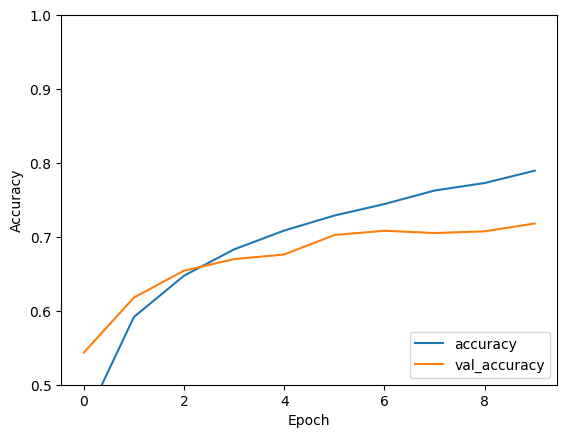

In [31]:
#TODO: Plot accuracy 
plt.plot( history.history['accuracy'] , label='accuracy')
plt.plot( history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_acc, test_loss = model.evaluate( test_images ,  test_labels , verbose=2)

In [33]:
print(test_acc)
print(test_loss)

0.8650783896446228
0.7181000113487244


### The following are the application of mentioned steps for preventing overfitting

In [34]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])
model = models.Sequential()

# Data augmentation (only active during training)
model.add(data_augmentation)

# First Conv block
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))   # 👈 NEW

# Second Conv block
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))   # 👈 NEW

# Third Conv layer
model.add(layers.Conv2D(64, (3,3), activation='relu'))




/Users/naghamhabli/Desktop/the ai engineering/deep learning/Tensorflow Notebooks/venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Flatten
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(64, activation='relu'))#takes same nb of neurons and activation function as the last conv layer
model.add(layers.Dropout(0.5))   
model.add(layers.Dense(10))  #since its the output layer, the output must be the classes which is 10


In [36]:
#TODO: Choose adam optimizer and the correct loss function
model.compile(optimizer= 'adam' , #since we are only testing and dont benchmarking
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_images,
    train_labels,
    epochs=15,
    validation_data=(test_images, test_labels),  #Helps in overfitting/underfitting detection
    callbacks=[early_stop]
)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3150 - loss: 1.8518 - val_accuracy: 0.4334 - val_loss: 1.5356
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4296 - loss: 1.5828 - val_accuracy: 0.5127 - val_loss: 1.3776
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4626 - loss: 1.4949 - val_accuracy: 0.5359 - val_loss: 1.2580
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4859 - loss: 1.4382 - val_accuracy: 0.5787 - val_loss: 1.1863
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4994 - loss: 1.4068 - val_accuracy: 0.5950 - val_loss: 1.1443
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5141 - loss: 1.3728 - val_accuracy: 0.5995 - val_loss: 1.1343
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5247 - loss: 1.3492 - val_accuracy: 0.5819 - val_loss: 1.1727
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5347 - loss: 1

313/313 - 0s - 1ms/step - accuracy: 0.6512 - loss: 0.9935


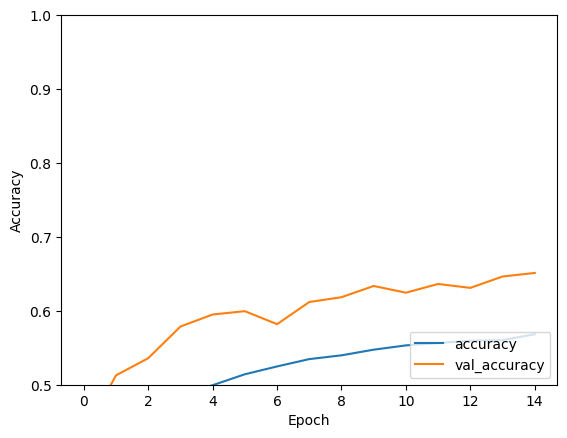

In [37]:
#TODO: Plot accuracy 
plt.plot( history.history['accuracy'] , label='accuracy')
plt.plot( history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_acc, test_loss = model.evaluate( test_images ,  test_labels , verbose=2)

In [40]:
print(test_acc)


0.9935008883476257
